In [5]:
import csv
import requests
from bs4 import BeautifulSoup

# Open CSV file to store job details
file = open('new_linkedin_job.csv', 'w', newline='', encoding='utf-8')
writer = csv.writer(file)
writer.writerow(['Title', 'Company', 'Location', 'Apply', 'Main Category', 'Sub Category'])

def classify_job(title):
    title = title.lower()
    
    job_categories = {
        "Software & IT": {
            "Frontend Developer": ["react", "angular", "vue", "javascript"],
            "Backend Developer": ["node.js", "java", "python", "ruby", "php"],
            "Full Stack Developer": ["full stack", "mern", "mean"],
            "Software Engineer": ["software engineer", "programmer", "developer"]
        },
        "Data & Analytics": {
            "Data Scientist": ["data science", "machine learning", "ai", "deep learning"],
            "Data Analyst": ["sql", "tableau", "excel", "power bi"],
            "Data Engineer": ["big data", "hadoop", "spark", "etl"]
        },
        "Marketing & Sales": {
            "Digital Marketing": ["seo", "ppc", "google ads", "social media"],
            "Sales Manager": ["sales", "business development", "b2b", "b2c"]
        },
        "Finance & Banking": {
            "Financial Analyst": ["finance", "investment", "risk", "trading"],
            "Accountant": ["accounting", "auditing", "cpa", "tax"]
        },
        "Healthcare": {
            "Doctor": ["surgeon", "physician", "specialist"],
            "Nurse": ["registered nurse", "healthcare", "clinical"]
        },
        "Human Resources": {
            "Recruiter": ["talent acquisition", "hr", "hiring"],
            "HR Manager": ["people operations", "hr", "payroll"]
        },
        "Design & Creative": {
            "UI/UX Designer": ["user experience", "wireframe", "figma", "adobe xd"],
            "Graphic Designer": ["illustrator", "photoshop", "branding"]
        },
        "Operations & Admin": {
            "Operations Manager": ["logistics", "supply chain", "inventory"],
            "Administrative Assistant": ["admin", "coordinator", "office support"]
        },
        "Legal": {
            "Lawyer": ["attorney", "legal", "compliance", "contracts"]
        }
    }
    
    for main_category, sub_categories in job_categories.items():
        for sub_category, keywords in sub_categories.items():
            if any(keyword in title for keyword in keywords):
                return main_category, sub_category
    
    return "Other", "Other"  # If no category matches

# Web scraping function
def linkedin_scraper(webpage, page_number):
    next_page = webpage + str(page_number)
    print(f"Scraping: {next_page}")

    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
    response = requests.get(next_page, headers=headers)
    
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extract job listings
    jobs = soup.find_all('div', class_='base-card')

    for job in jobs:
        try:
            job_title = job.find('h3', class_='base-search-card__title').text.strip()
            job_company = job.find('h4', class_='base-search-card__subtitle').text.strip()
            job_location = job.find('span', class_='job-search-card__location').text.strip()
            job_link = job.find('a', class_='base-card__full-link')['href']

            # Check for missing or masked data (****)
            if "****" in job_title or "****" in job_company or "****" in job_location:
                continue  # Skip entries with hidden data

            # Classify job category
            job_main_category, job_sub_category = classify_job(job_title)

            # Write to CSV
            writer.writerow([job_title, job_company, job_location, job_link, job_main_category, job_sub_category])

        except AttributeError:
            continue  # Skip if any detail is missing

    print(f"Page {page_number} scraped and data updated.")

    # Scrape next page (LinkedIn uses increments of 25)
    if page_number < 100:
        linkedin_scraper(webpage, page_number + 25)
    else:
        file.close()
        print("File closed.")

# Start scraping
linkedin_scraper('https://www.linkedin.com/jobs/search?keywords=&location=New%20Delhi%2C%20Delhi%2C%20India&geoId=115918471&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0&start=', 0)

Scraping: https://www.linkedin.com/jobs/search?keywords=&location=New%20Delhi%2C%20Delhi%2C%20India&geoId=115918471&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0&start=0
Page 0 scraped and data updated.
Scraping: https://www.linkedin.com/jobs/search?keywords=&location=New%20Delhi%2C%20Delhi%2C%20India&geoId=115918471&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0&start=25
Page 25 scraped and data updated.
Scraping: https://www.linkedin.com/jobs/search?keywords=&location=New%20Delhi%2C%20Delhi%2C%20India&geoId=115918471&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0&start=50
Page 50 scraped and data updated.
Scraping: https://www.linkedin.com/jobs/search?keywords=&location=New%20Delhi%2C%20Delhi%2C%20India&geoId=115918471&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0&start=75
Page 75 scraped and data updated.
Scraping: https://www.linkedin.com/jobs/search?keywords=&location=New%20Delhi%2C%20Delhi%2C%20Indi

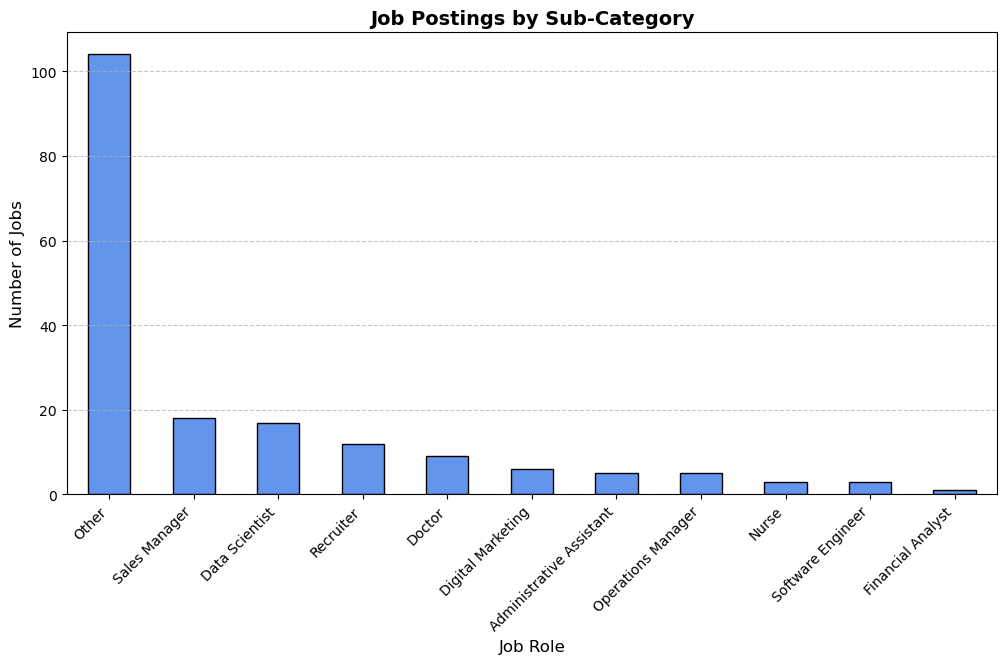

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the updated CSV file
df = pd.read_csv("new_linkedin_job.csv")

# Count job roles
job_counts = df["Sub Category"].value_counts()

# Plot
plt.figure(figsize=(12, 6))
job_counts.plot(kind="bar", color="cornflowerblue", edgecolor='black')
plt.title("Job Postings by Sub-Category", fontsize=14, fontweight='bold')
plt.xlabel("Job Role", fontsize=12)
plt.ylabel("Number of Jobs", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()